In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox

# Danger Metric Associations

Let's start by just computing the average danger for each census tract.

In [3]:
danger_df = pd.read_pickle('../../data/consolidated_danger_by_node_id.pkl.gz')
danger_df.head()

,DANGER,OLD_NODE_IDS,CENSUS_TRACT_ID
0,0.000000,[42421828],2800
1,4.722819,[42430942],2400
2,3.771228,[42430938],2800
3,0.000000,"[42421837, 5481976931, 5481976926]",2800
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830...",6300


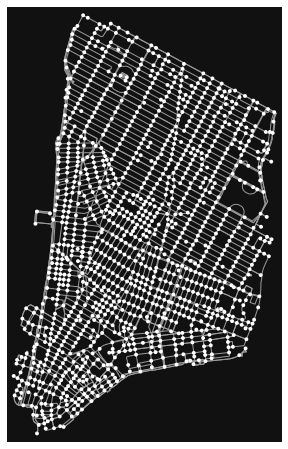

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
G = ox.io.load_graphml('../../data/consolidated_mnh_below_34th.graphml')
ox.plot.plot_graph(G)

In [6]:
tract_gdf = gpd.read_file('../../data/2010_Census_Tracts/geo_export_85c202c5-6ec9-493e-b0ec-a13efa26758d.shp')
tract_gdf.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."


In [9]:
danger_by_tract_df = danger_df.groupby('CENSUS_TRACT_ID').mean()
danger_by_tract_df.head()

,DANGER
CENSUS_TRACT_ID,
201,1.869849
202,2.457475
600,3.391251
700,1.900318
800,2.622768


In [22]:
tract_gdf['ct2010'] = tract_gdf['ct2010'].apply(int)
tract_danger_gdf = tract_gdf.merge(danger_by_tract_df, how='inner', left_on='ct2010', right_index=True)
tract_danger_gdf.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,DANGER
0,5,5000900,Staten Island,E,900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",1.103187
1177,1,1000900,Manhattan,I,900,9,MN25,Battery Park City-Lower Manhattan,3810,3.133615e+06,16461.007821,"MULTIPOLYGON (((-74.00078 40.69429, -74.00096 ...",1.103187
1970,3,3000900,Brooklyn,I,900,9,BK09,Brooklyn Heights-Cobble Hill,4004,1.739278e+06,5883.202084,"POLYGON ((-73.99067 40.69457, -73.99044 40.693...",1.103187
16,3,3005800,Brooklyn,E,5800,58,BK31,Bay Ridge,4013,2.080303e+06,6098.167800,"POLYGON ((-74.02956 40.61983, -74.02821 40.619...",2.879296
1374,1,1005800,Manhattan,I,5800,58,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.879679e+06,5720.573856,"POLYGON ((-73.98730 40.74468, -73.98775 40.744...",2.879296


<AxesSubplot:>

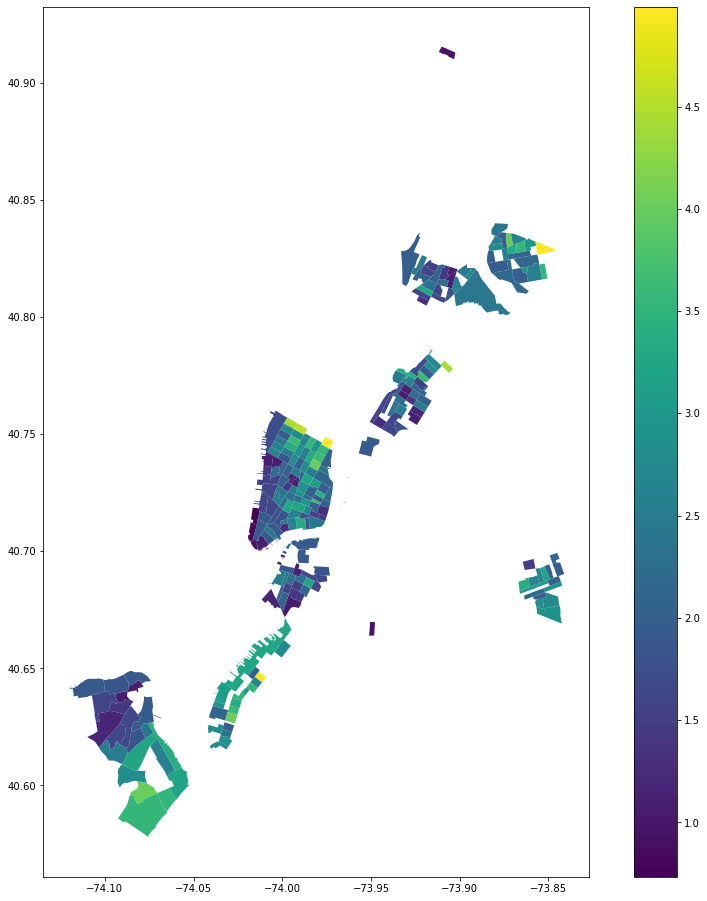

In [23]:
tract_danger_gdf.plot(column='DANGER', cmap='viridis', legend=True, figsize=(16, 16))